**RS - Assignment solution:**

**1. Import the necessary libraries and read the provided CSVs as a data frame and perform the below steps. [15 Marks]**

In [183]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
plt.rcParams.update({'figure.figsize':(7,5), 'figure.dpi':100})

**1.A) Merge all the provided CSVs into one dataFrame. [2 Marks]**

In [184]:
data1 = pd.read_csv(".\Data Set\Data Set\phone_user_review_file_1.csv",encoding="latin-1")
data2 = pd.read_csv(".\Data Set\Data Set\phone_user_review_file_2.csv",encoding="latin-1")
data3 = pd.read_csv(".\Data Set\Data Set\phone_user_review_file_3.csv",encoding="latin-1")
data4 = pd.read_csv(".\Data Set\Data Set\phone_user_review_file_4.csv",encoding="latin-1")
data5 = pd.read_csv(".\Data Set\Data Set\phone_user_review_file_5.csv",encoding="latin-1")
data6 = pd.read_csv(".\Data Set\Data Set\phone_user_review_file_6.csv",encoding="latin-1")

In [185]:
data = pd.concat([data1,data2,data3,data4,data5,data6],axis=0)

In [186]:
data.shape

(1415133, 11)

In [187]:
data.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
0,/cellphones/samsung-galaxy-s8/,5/2/2017,en,us,Verizon Wireless,verizonwireless.com,10.00,10.00,As a diehard Samsung fan who has had every Sam...,CarolAnn35,Samsung Galaxy S8
1,/cellphones/samsung-galaxy-s8/,4/28/2017,en,us,Phone Arena,phonearena.com,10.00,10.00,Love the phone. the phone is sleek and smooth ...,james0923,Samsung Galaxy S8


**1.B)Explore, understand the Data and share at least 2 observations. [2 Marks]**

In [188]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1415133 entries, 0 to 163836
Data columns (total 11 columns):
phone_url    1415133 non-null object
date         1415133 non-null object
lang         1415133 non-null object
country      1415133 non-null object
source       1415133 non-null object
domain       1415133 non-null object
score        1351644 non-null float64
score_max    1351644 non-null float64
extract      1395772 non-null object
author       1351931 non-null object
product      1415132 non-null object
dtypes: float64(2), object(9)
memory usage: 129.6+ MB


Most of the columns are nominal, rating score and score_max are float dtypes

In [189]:
pd.options.display.float_format = "{:.2f}".format
data.describe()

,score,score_max
count,1351644.00,1351644.00
mean,8.01,10.00
std,2.62,0.00
min,0.20,10.00
25%,7.20,10.00
50%,9.20,10.00
75%,10.00,10.00
max,10.00,10.00


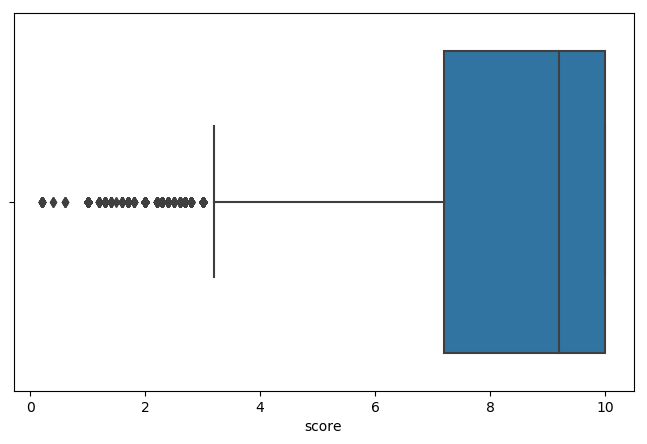

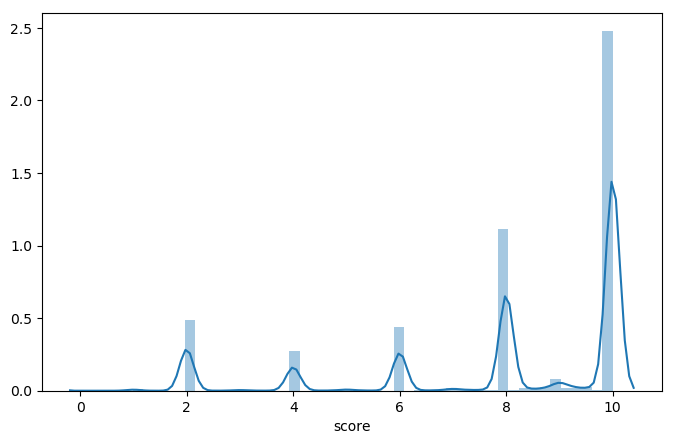

In [190]:
#Checking Outliers
plt.figure(figsize=(8,5))
sns.boxplot(data["score"])
plt.show()

plt.figure(figsize=(8,5))
sns.distplot(data["score"].dropna())
plt.show()

**Observation:**

1. Score ratings are left skewed as shown above, denoting very few low ratings for some mobiles.
2. Most of the ratings are on higher ends from 8 to 10 for some mobiles.

**1.C) Round off scores to the nearest integers. [3 Marks]**

In [191]:
data["score"] = data['score'].round(0).astype('Int64')

print(data["score"].head(2))

0    10
1    10
Name: score, dtype: Int64


In [192]:
data["score"].unique()

<IntegerArray>
[10, 6, 9, 4, 8, 2, 7, 5, NaN, 3, 1, 0]
Length: 12, dtype: Int64

**1.D) Check for missing values. Impute the missing values, if any. [2 Marks]**

In [193]:
data["score_max"].unique()

array([10., nan])

Imputing 10 for each nan in score_max column make sense

In [194]:
data["score_max"]=data["score_max"].fillna(10)

**1.E)Check for duplicate values and remove them, if any. [2 Marks]**

In [195]:
data.duplicated().sum()

6436

In [196]:
data.drop_duplicates(inplace=True)

In [197]:
data.dropna(inplace=True)

In [198]:
data.isnull().sum()

phone_url    0
date         0
lang         0
country      0
source       0
domain       0
score        0
score_max    0
extract      0
author       0
product      0
dtype: int64

In [199]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1271437 entries, 0 to 163836
Data columns (total 11 columns):
phone_url    1271437 non-null object
date         1271437 non-null object
lang         1271437 non-null object
country      1271437 non-null object
source       1271437 non-null object
domain       1271437 non-null object
score        1271437 non-null Int64
score_max    1271437 non-null float64
extract      1271437 non-null object
author       1271437 non-null object
product      1271437 non-null object
dtypes: Int64(1), float64(1), object(9)
memory usage: 117.6+ MB


**1.F) Keep only 1 Million data samples. Use random state=612. [2 Marks]**

In [200]:
reduced_data = data.sample(n=1000000,random_state=612)

In [201]:
reduced_data.head(2)

,phone_url,date,lang,country,source,domain,score,score_max,extract,author,product
20276,/cellphones/lenovo-vibe-k5/,7/25/2016,en,in,Amazon,amazon.in,10,10.00,Good product in this price...,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
104794,/cellphones/samsung-galaxy-s6/,11/10/2016,es,es,Samsung,samsung.com,8,10.00,"En general me gusta mucho mi nuevo S6, el reco...",Evyta,Samsung Galaxy S6


**1.G) Drop irrelevant features. Keep features like Author, Product, and Score. [2 Marks]**

In [202]:
reduced_data.drop(["phone_url", "date","lang","country","domain","score_max","extract","source"], axis = 1,inplace=True)

In [203]:
reduced_data.head()

,score,author,product
20276,10,KHILESH KUMAR VERMA,"Lenovo Vibe K5 (Gold, VoLTE update)"
104794,8,Evyta,Samsung Galaxy S6
321393,8,VanRaZor,Sony Ericsson K810i
78000,6,ruga,Sony Xperia Z2 (Black)
16933,10,einer Kundin,"Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,..."


In [204]:
reduced_data.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 1000000 entries, 20276 to 13526
Data columns (total 3 columns):
score      1000000 non-null Int64
author     1000000 non-null object
product    1000000 non-null object
dtypes: Int64(1), object(2)
memory usage: 31.5+ MB


**2. Answer the following questions. [10 Marks]**

**2.A) Identify the most rated products. [3 Marks]**

In [205]:
#reduced_data.groupby("product")["score"].count().sort_values(ascending=False).head(10)

In [206]:
reduced_data.groupby("product")["score"].mean().sort_values(ascending=False).head(10)

product
æ©æç½æ C168i                                                                                                            10.00
Nokia C5 Sim Free Mobile Phone - Warm Grey                                                                                    10.00
Nokia N95 8GB Black Sim Free Unlocked Mobile Phone                                                                            10.00
Nokia N95 160 MB US Version Unlocked Cell Phone w/ GPS, Wi-Fi, 5MP Camera                                                     10.00
Nokia N95 - Warm graphite Smartphone                                                                                          10.00
Nokia N93i Sim Free Mobile Phone                                                                                              10.00
Nokia N900 Zwart                                                                                                              10.00
Nokia N900 TÃ©lÃ©phone portable UMTS / WLAN / GPS / Maemo / Appareil

**2.B) Identify the users with most number of reviews. [3 Marks]**

In [207]:
data.groupby("author")["score"].count().sort_values(ascending=False).head(5)

author
Amazon Customer    76933
Cliente Amazon     19300
e-bit               8411
Client d'Amazon     7716
Amazon Kunde        4746
Name: score, dtype: int64

**2.C) Select the data with products having more than 50 ratings and users who have given more than 50 ratings. Report the shape of the final dataset. [4 Marks]**

In [208]:
products = reduced_data["product"].value_counts()
product50 = products[products>50].index.tolist() # list of products with > 50 ratings
print("Number of products with 50+ ratings:", len(product50))

authors = reduced_data["author"].value_counts()
author50 = authors[authors>50].index.tolist() # list of authors with > 50 ratings
print("Number of users with 50+ ratings count:", len(author50))

productAndAuthorWithAbove50 = reduced_data[(reduced_data["author"].isin(author50)) & (reduced_data["product"].isin(product50))]
print("Shape of final dataset", productAndAuthorWithAbove50.shape)
print(productAndAuthorWithAbove50.head())

Number of products with 50+ ratings: 4473
Number of users with 50+ ratings count: 630
Shape of final dataset (111595, 3)
        score           author  \
16933      10     einer Kundin   
72813      10   Cliente Amazon   
61356      10     ÐÐ½Ð´ÑÐµÐ¹   
76024       2  Amazon Customer   
308465     10  Amazon Customer   

                                                  product  
16933   Samsung Galaxy S7 edge Smartphone, 13,9 cm (5,...  
72813     Samsung E1200 Telefono Cellulare, Nero [Italia]  
61356                                  LG P920 Optimus 3D  
76024                         OnePlus 3 (Graphite, 64 GB)  
308465  Asus Zenfone Max ZC550KL-6A076IN (Black, 3GB, ...  


**3. Build a popularity based model and recommend top 5 mobile phones. [5 Marks]**

In [209]:
reduced_data.groupby("product")["score"].count().sort_values(ascending=False).head(10)

product
Lenovo Vibe K4 Note (White,16GB)                4109
Lenovo Vibe K4 Note (Black, 16GB)               3451
OnePlus 3 (Graphite, 64 GB)                     3212
OnePlus 3 (Soft Gold, 64 GB)                    2798
Huawei P8lite zwart / 16 GB                     2121
Lenovo Vibe K5 (Gold, VoLTE update)             2011
Samsung Galaxy S6 zwart / 32 GB                 1837
Lenovo Vibe K5 (Grey, VoLTE update)             1680
Lenovo Used Lenovo Zuk Z1 (Space Grey, 64GB)    1529
Samsung Galaxy J3 (8GB)                         1449
Name: score, dtype: int64

In [210]:
ratings_mean_count = pd.DataFrame(reduced_data.groupby("product")["score"].mean()) 

In [211]:
ratings_mean_count.head(2)

,score
product,
"'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.00
"'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...",10.00


In [212]:
ratings_mean_count["rating_counts"] = pd.DataFrame(reduced_data.groupby("product")["score"].count())

In [213]:
ratings_mean_count["rating_counts"].head(2)

product
'Sony Xperia X (F5122) â White â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...    1
'Sony Xperia X (F5122) â rosa â Dual Sim (Google Android 6.0.1, 5 Display, 2 x CORTEX A72 1.8 GHz + 4 x cortex-a53...     1
Name: rating_counts, dtype: int64

In [214]:
ratings_mean_count["rating_counts"].sort_values(ascending=False).head(5)

product
Lenovo Vibe K4 Note (White,16GB)     4109
Lenovo Vibe K4 Note (Black, 16GB)    3451
OnePlus 3 (Graphite, 64 GB)          3212
OnePlus 3 (Soft Gold, 64 GB)         2798
Huawei P8lite zwart / 16 GB          2121
Name: rating_counts, dtype: int64

**4. Build a collaborative filtering model using SVD. You can use SVD from surprise or build it from scratch(Note: Incase you’re building it from scratch you 
can limit your data points to 5000 samples if you face memory issues). Build a collaborative filtering model using kNNWithMeans from surprise. You 
can try both user-based and item-based model. [10 Marks]**

In [215]:
from surprise import Dataset,Reader
from surprise import SVD, KNNWithMeans
from surprise import accuracy
from surprise.model_selection import train_test_split
from collections import defaultdict

In [216]:
svdData = Dataset.load_from_df(reduced_data[["author", "product", "score"]],  Reader(rating_scale=(1, 10)))

In [217]:
trainset, testset = train_test_split(svdData, test_size=.25,random_state=42)

In [218]:
trainset.all_ratings()

<generator object Trainset.all_ratings at 0x00000249AA551B10>

In [219]:
svdModel = SVD(n_factors=5,biased=False)
svdModel.fit(trainset)

In [220]:
svdPred = svdModel.test(testset)

In [221]:
print("Listing few prediction values: \n")
print(svdPred[0:2])

Listing few prediction values: 

[Prediction(uid='cajano', iid='Samsung ATIV S i8750', r_ui=10.0, est=8.011010666666667, details={'was_impossible': True, 'reason': 'User and item are unknown.'}), Prediction(uid='Amazon Kunde', iid='LG Electronics G Flex 2 Smartphone (13,97 cm (5,5 Zoll) Full-HD-POLED-Display, Qualcomm Snapdragon 810 2-GHz-Octa-Core-Prozessor, 13-Megapixelkamera, 16 GB interner Speicher, Android 5.0) Platinum Silver', r_ui=8.0, est=8.463277689829448, details={'was_impossible': False})]


In [222]:
accuracy.rmse(svdPred)

RMSE: 3.1398


3.139793419433229

**KNNWithMeans Item-Item based**

Limiting datapoints to 5000 samples:

In [223]:
reduced_data5000 = reduced_data.sample(n=5000,random_state=612)

In [224]:
sampleData = Dataset.load_from_df(reduced_data5000[["author", "product", "score"]],  Reader(rating_scale=(1, 10)))
trainset, testset = train_test_split(sampleData, test_size=.25,random_state=42)

In [225]:
itemBasedCF = KNNWithMeans(k=50,  sim_options={"name": "pearson_baseline", "user_based": False})
itemBasedCF.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [226]:
knnItemPred=itemBasedCF.test(testset)
print(accuracy.rmse(knnItemPred))

RMSE: 2.5997
2.5997158766929847


In [227]:
print("Listing few prediction values: \n")
print(knnItemPred[0:2])

Listing few prediction values: 

[Prediction(uid='vuralerol76', iid='NOKIA E51 CEP TELEFONU', r_ui=10.0, est=8.021333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='Wela', iid='Jiayu G4', r_ui=10.0, est=8.021333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})]


**KNNWithMeans Item-Item based**

In [228]:
userBasedCF = KNNWithMeans(k=10, sim_options={"name": "pearson_baseline", "user_based": True})
userBasedCF.fit(trainset)

Estimating biases using als...
Computing the pearson_baseline similarity matrix...
Done computing similarity matrix.


In [229]:
knnUserPred=userBasedCF.test(testset)
print(accuracy.rmse(knnUserPred))

RMSE: 2.6089
2.6089482891451383


In [230]:
print("Listing few prediction values: \n")
print(knnUserPred[0:2])

Listing few prediction values: 

[Prediction(uid='vuralerol76', iid='NOKIA E51 CEP TELEFONU', r_ui=10.0, est=8.021333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'}), Prediction(uid='Wela', iid='Jiayu G4', r_ui=10.0, est=8.021333333333333, details={'was_impossible': True, 'reason': 'User and/or item is unknown.'})]


**5. Evaluate the collaborative model. Print RMSE value. [2 Marks]**

In [231]:
itemItemRSME =  accuracy.rmse(knnItemPred)
userUserRSME =  accuracy.rmse(knnUserPred)
print("For item-item based collaborative filtering:", itemItemRSME )
print("For user-user based collaborative filtering:", userUserRSME)

RMSE: 2.5997
RMSE: 2.6089
For item-item based collaborative filtering: 2.5997158766929847
For user-user based collaborative filtering: 2.6089482891451383


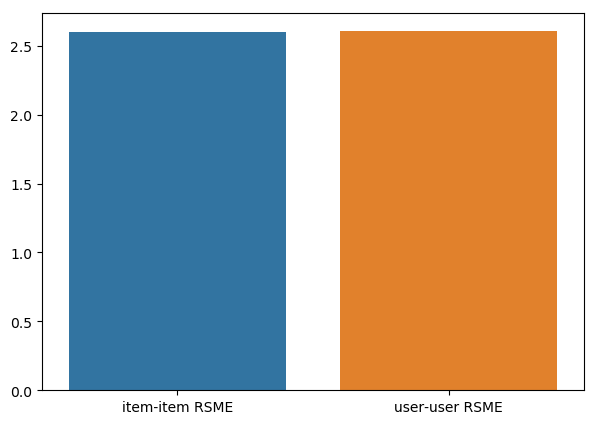

In [232]:
sns.barplot(x=['item-item RSME', 'user-user RSME'],y=[itemItemRSME, userUserRSME])

**6. Predict score (average rating) for test users. [2 Marks]**

In [233]:
svdPredictionDF = pd.DataFrame(svdPred)
itemItemPredictionDF = pd.DataFrame(knnItemPred)
userUserPredictionDF = pd.DataFrame(knnUserPred)

print("Average prediction for svm \n\n", svdPredictionDF.groupby('uid')['r_ui'].mean().sort_values(ascending=False).head(5))
print("Average prediction for item CF \n\n",itemItemPredictionDF.groupby('uid')['r_ui'].mean().sort_values(ascending=False).head(5))
print("Average prediction for user CF \n\n",userUserPredictionDF.groupby('uid')['r_ui'].mean().sort_values(ascending=False).head(5))

Average prediction for svm 

 uid
Raj Singh Tanwar        10.00
Bodo Wrobel             10.00
Boese7                  10.00
Diptanu Bhattacharjee   10.00
Body777                 10.00
Name: r_ui, dtype: float64
Average prediction for item CF 

 uid
#                      10.00
Julio Lezama           10.00
Juan Pablo Hernandez   10.00
andreea                10.00
amina amina            10.00
Name: r_ui, dtype: float64
Average prediction for user CF 

 uid
#                      10.00
Julio Lezama           10.00
Juan Pablo Hernandez   10.00
andreea                10.00
amina amina            10.00
Name: r_ui, dtype: float64


**7. Report your findings and inferences. [2 Marks]**

Overall data is highly skewed towards 'Amazon customers' from different countries. This may also be because 'Amazon' is the biggest trader for phones in the world. Although correct 'user' names from 'Amazon' should have used.
Most of the authors have given the rating of '10' or '8'
Both knn_i(item-based) and knn_u(user-based) have roughly similar RMSE

**8. Try and recommend top 5 products for test users. [5 Marks]**

In [234]:
def getTopFiveRecommentations(predictions, n=5):
    top5 = defaultdict(list)
    for uid, iid, true_r, est, _ in predictions:
        top5[uid].append((iid, est))

    for uid, ratings in top5.items():
        ratings.sort(key=lambda x: x[1], reverse=True)
        top5[uid] = ratings[:n]

    return top5

In [235]:
top5 = getTopFiveRecommentations(knnItemPred,5)
for key,value in top5.items(): 
    print(key,'-> ',value,'\n')

vuralerol76 ->  [('NOKIA E51 CEP TELEFONU', 8.021333333333333)] 

Wela ->  [('Jiayu G4', 8.021333333333333)] 

Andrew_Ural ->  [('Samsung Galaxy Mini 2 (S6500)', 8.021333333333333)] 

n1try ->  [('HTC One S Smartphone (10,9 cm (4,3 Zoll) AMOLED-Tochscreen, 8 Megapixel Kamera, Android OS) grau', 8.021333333333333)] 

andrei-meigui ->  [('Huawei G525', 8.021333333333333)] 

yossiaviel ->  [('×\x98×\x9c×¤×\x95×\x9f ×¡×\x9c×\x95×\x9c×¨×\x99 Samsung Galaxy A7 SM-A710F', 8.021333333333333)] 

jimmyK ->  [('Samsung SGH-G600', 8.021333333333333)] 

ÐÑÑÐµÐ² ÐÐ»Ð°Ð´Ð¸Ð¼Ð¸Ñ ->  [('Nokia Lumia 720', 8.021333333333333)] 

JESSICA B. ->  [('Samsung Smartphone Samsung Galaxy J7 16 Go Blanc', 8.021333333333333)] 

Seetharam Rallabandi ->  [('OnePlus One (16GB, Silk White)', 8.021333333333333)] 

coffeelele ->  [('Samsung I9301 Galaxy S III Neo Smartphone, 16 GB, Blu [Italia]', 8.021333333333333)] 

manu21 ->  [('Samsung SGH P310 cardFon', 8.021333333333333)] 

Stefan G. ->  [('Samsung i8200N Gala

**9. Try other techniques (Example: cross validation) to get better results. [3 Marks]**

In [236]:
from surprise.model_selection import cross_validate

benchmark = []
# Iterate over all algorithms
for algo in [SVD(),KNNWithMeans()]:
    results = cross_validate(algo, sampleData, measures=["RMSE"], cv=5, verbose=False)
    tmp = pd.DataFrame.from_dict(results).mean(axis=0)
    tmp = tmp.append(pd.Series([str(algo).split(' ')[0].split('.')[-1]], index=["Algorithm"]))
    benchmark.append(tmp)
    
pd.DataFrame(benchmark).set_index("Algorithm").sort_values("test_rmse")   

Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.
Computing the msd similarity matrix...
Done computing similarity matrix.


,test_rmse,fit_time,test_time
Algorithm,,,
SVD,2.59,0.20,0.01
KNNWithMeans,2.60,0.21,0.01


**10. In what business scenario you should use popularity based Recommendation Systems ? [2 Marks]**

Popularity based recommendation systems can be useful in multiple scenarios like:

Recommending the popular songs available on the App.

Recommending the popular trend in fashion industry.

Recommending the popular destination tour for vacation.

**11. In what business scenario you should use CF based Recommendation Systems ? [2 Marks]**

Collaborative filtering is useful in scenarios like:

Asking a user to rate an item on a sliding scale.

Asking a user to search.

Asking a user to rank a collection of items from favorite to least favorite.

Presenting two items to a user and asking him/her to choose the better one of them.

Asking a user to create a list of items that he/she likes (see Rocchio classification or other similar techniques).

Observing the items that a user views in an online store.

Analyzing item/user viewing times.

Keeping a record of the items that a user purchases online.

Obtaining a list of items that a user has listened to or watched on his/her computer.

Analyzing the user's social network and discovering similar likes and dislikes.

**12. What other possible methods can you think of which can further improve the recommendation for different users ? [2 Marks]**

Hybrid recommendation system with combinaion of content and collaboratove methods is more likely to provide better recommendations on industry based datasets. It can help with issues like cold start, scalability and sparsity. Netflix is an excellent example of hybrid R-system (like comparing the watching and searching habits of users and finding similar users.